In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "goldup"

## 1. Nạp các thư viện cần thiết

In [3]:
library(readr)
library(dplyr)
library(ggplot2)
library(tidyr)
library(corrplot)
library(summarytools)


corrplot 0.92 loaded

Warning message:
“no DISPLAY variable so Tk is not available”
system might not have X11 capabilities; in case of errors when using dfSummary(), set st_options(use.x11 = FALSE)


Attaching package: ‘summarytools’


The following object is masked from ‘package:tibble’:

    view




## 1. Import Data

In [49]:
library(readr)
gold_data <- read_csv("/kaggle/input/goldup/GoldUP.csv", show_col_types = FALSE)
gold_data$Date <- as.Date(gold_data$Date, format = "%d-%m-%Y")

min_max_scale <- function(x) {
  return((x - min(x)) / (max(x) - min(x)))
}

# Chuẩn hóa tất cả các cột ngoại trừ cột Date
gold_data[,-1] <- apply(gold_data[,-1], 2, min_max_scale)

# Kiểm tra dữ liệu sau chuẩn hóa
head(gold_data)
gold_data <<- gold_data


Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-10-01,5.570401e-03,0.09406382,0.6250000,0.1886173,0.02339672,0.005401318,0.9258877
2000-11-01,4.439877e-03,0.10349521,0.6250000,0.2012426,0.03086171,0.006265529,0.8967795
2000-12-01,5.632066e-03,0.04813219,0.6250000,0.2002182,0.03018875,0.002700659,0.7795211
2001-01-01,4.090442e-03,0.05311115,0.6250000,0.1945251,0.03941300,0.001836448,0.7993394
2001-02-01,2.117163e-03,0.06288031,0.5416667,0.1939434,0.03734027,0.000000000,0.8300991
2001-03-01,4.110997e-05,0.04620153,0.4583333,0.1965145,0.02062268,0.001836448,0.9407514


## 2. EDA

## 2.1. Đọc dữ liệu

In [5]:

head(gold_data)
summary(gold_data)

Date,Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000-10-01,5.570401e-03,0.09406382,0.6250000,0.1886173,0.02339672,0.005401318,0.9258877
2000-11-01,4.439877e-03,0.10349521,0.6250000,0.2012426,0.03086171,0.006265529,0.8967795
2000-12-01,5.632066e-03,0.04813219,0.6250000,0.2002182,0.03018875,0.002700659,0.7795211
2001-01-01,4.090442e-03,0.05311115,0.6250000,0.1945251,0.03941300,0.001836448,0.7993394
2001-02-01,2.117163e-03,0.06288031,0.5416667,0.1939434,0.03734027,0.000000000,0.8300991
2001-03-01,4.110997e-05,0.04620153,0.4583333,0.1965145,0.02062268,0.001836448,0.9407514


      Date              Gold_Price        Crude_Oil      Interest_Rate   
 Min.   :2000-10-01   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:2005-09-16   1st Qu.:0.05027   1st Qu.:0.2141   1st Qu.:0.2917  
 Median :2010-09-01   Median :0.30399   Median :0.4001   Median :0.2917  
 Mean   :2010-08-31   Mean   :0.30898   Mean   :0.4156   Mean   :0.4110  
 3rd Qu.:2015-08-16   3rd Qu.:0.51587   3rd Qu.:0.5970   3rd Qu.:0.4583  
 Max.   :2020-08-01   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
    USD_INR           Sensex            CPI            USD_Index     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.1655   1st Qu.:0.1418   1st Qu.:0.09139   1st Qu.:0.1922  
 Median :0.2523   Median :0.3812   Median :0.34288   Median :0.3538  
 Mean   :0.3917   Mean   :0.3996   Mean   :0.39583   Mean   :0.3795  
 3rd Qu.:0.6646   3rd Qu.:0.6204   3rd Qu.:0.69828   3rd Qu.:0.5235  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.00000   Max.   :1

## 2.2. Kiểm tra thông tin thiếu

In [6]:
sum(is.na(gold_data))
colSums(is.na(gold_data))


[1] 0

Date    Gold_Price     Crude_Oil Interest_Rate       USD_INR 
            0             0             0             0             0 
       Sensex           CPI     USD_Index 
            0             0             0

In [7]:
gold_data <- gold_data %>% drop_na()


## 2.3. Phân tích phân phối (Histograms và Boxplots)

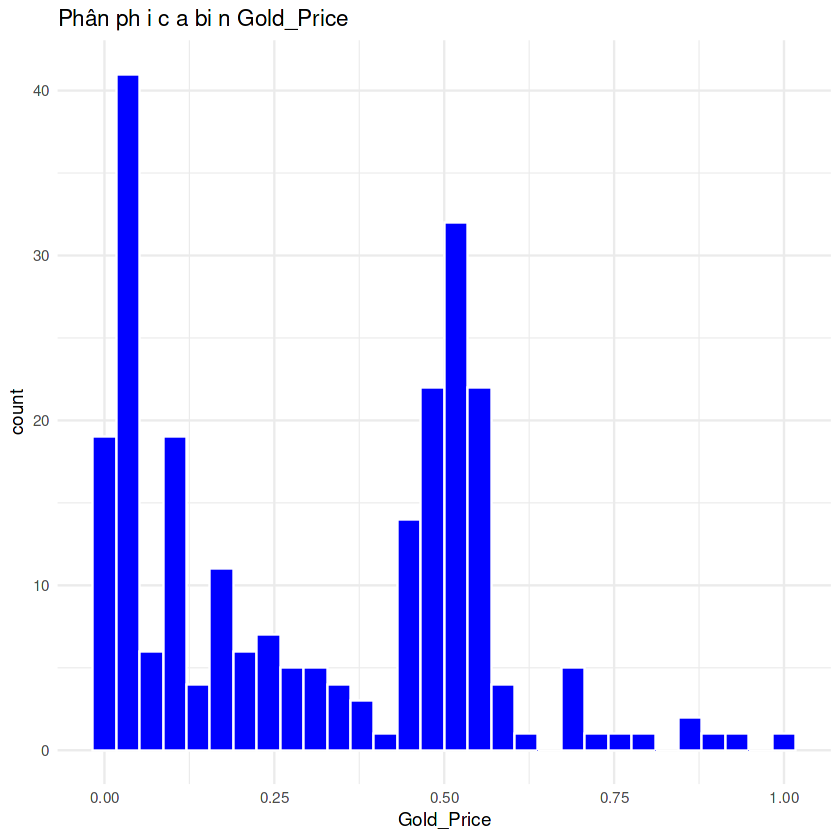

In [8]:
ggplot(gold_data, aes(x = Gold_Price)) + 
  geom_histogram(bins = 30, fill = "blue", color = "white") + 
  theme_minimal() +
  ggtitle("Phân phối của biến Gold_Price")


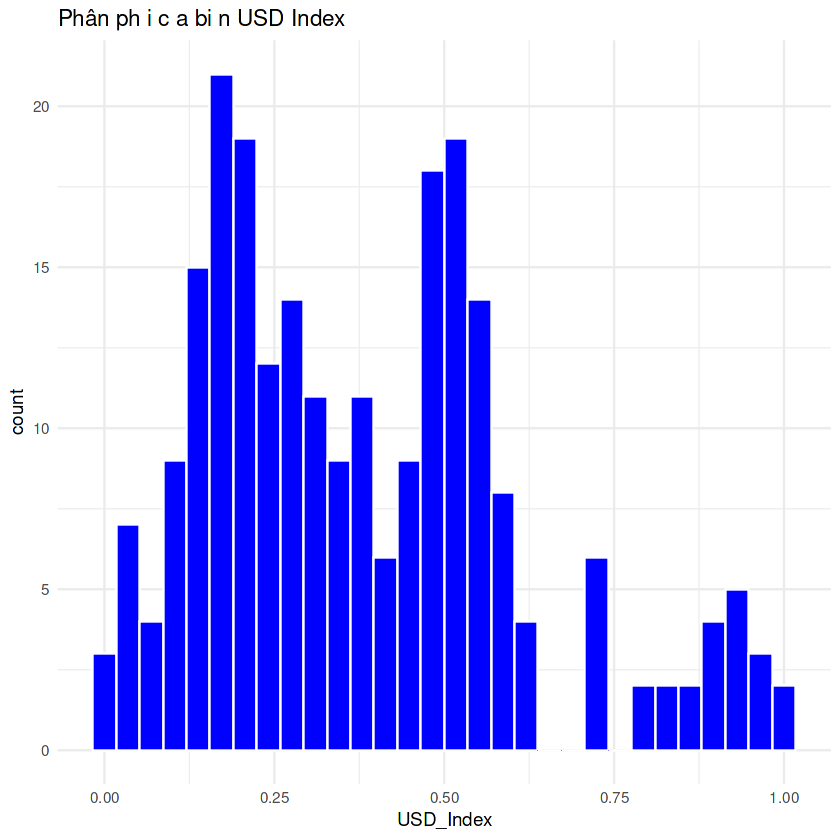

In [9]:
ggplot(gold_data, aes(x = USD_Index)) + 
  geom_histogram(bins = 30, fill = "blue", color = "white") + 
  theme_minimal() +
  ggtitle("Phân phối của biến USD Index")


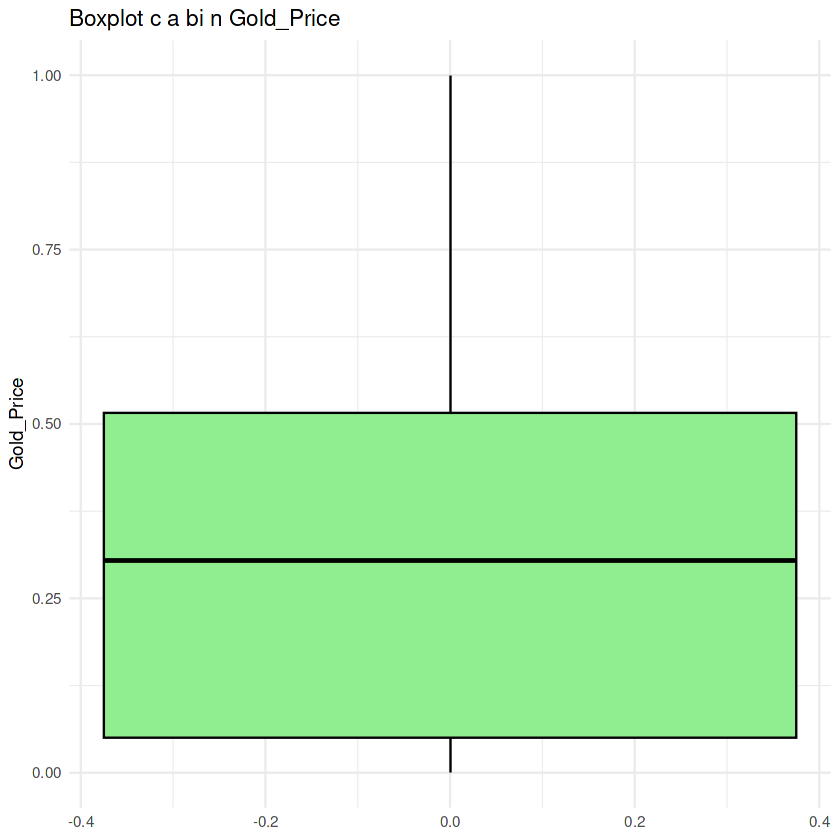

In [10]:
ggplot(gold_data, aes(y = Gold_Price)) + 
  geom_boxplot(fill = "lightgreen", color = "black") + 
  theme_minimal() +
  ggtitle("Boxplot của biến Gold_Price")


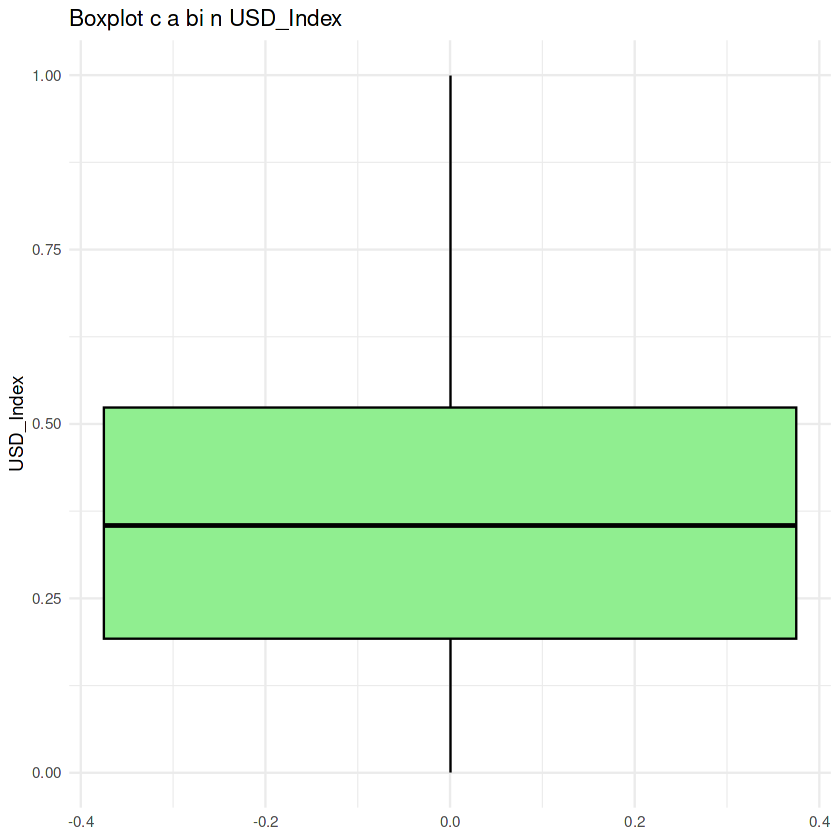

In [11]:
ggplot(gold_data, aes(y = USD_Index)) + 
  geom_boxplot(fill = "lightgreen", color = "black") + 
  theme_minimal() +
  ggtitle("Boxplot của biến USD_Index")


## 2.4. Quan hệ giữa các biến (Scatter plots và Correlation matrix)

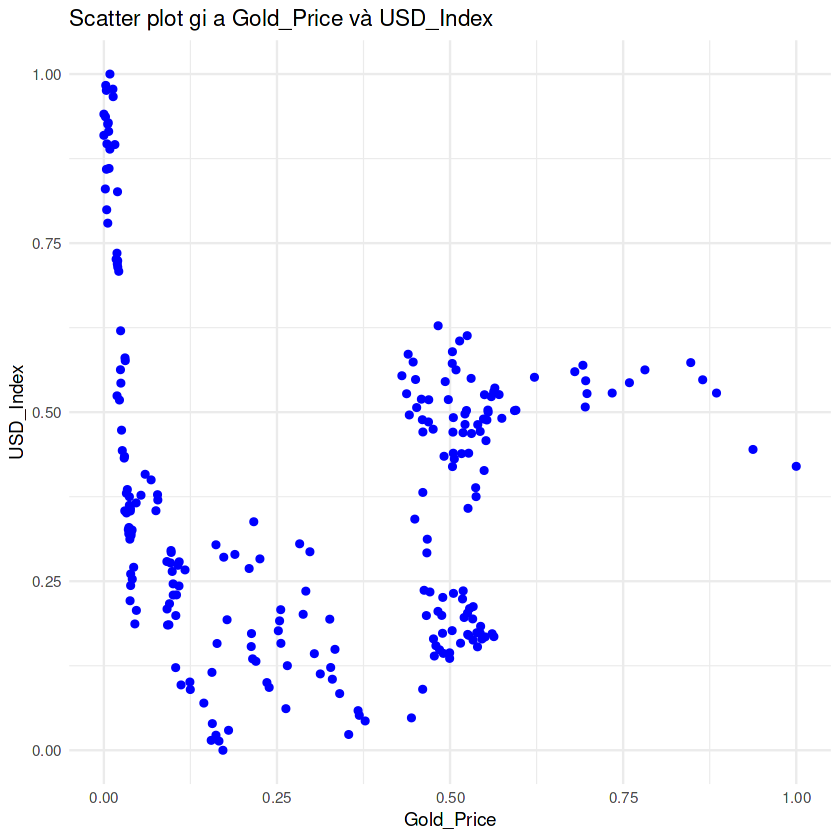

In [12]:
## Biểu đồ scatter plot để phân tích quan hệ giữa hai biến số:
ggplot(gold_data, aes(x = Gold_Price, y = USD_Index)) + 
  geom_point(color = "blue") + 
  theme_minimal() + 
  ggtitle("Scatter plot giữa Gold_Price và USD_Index")


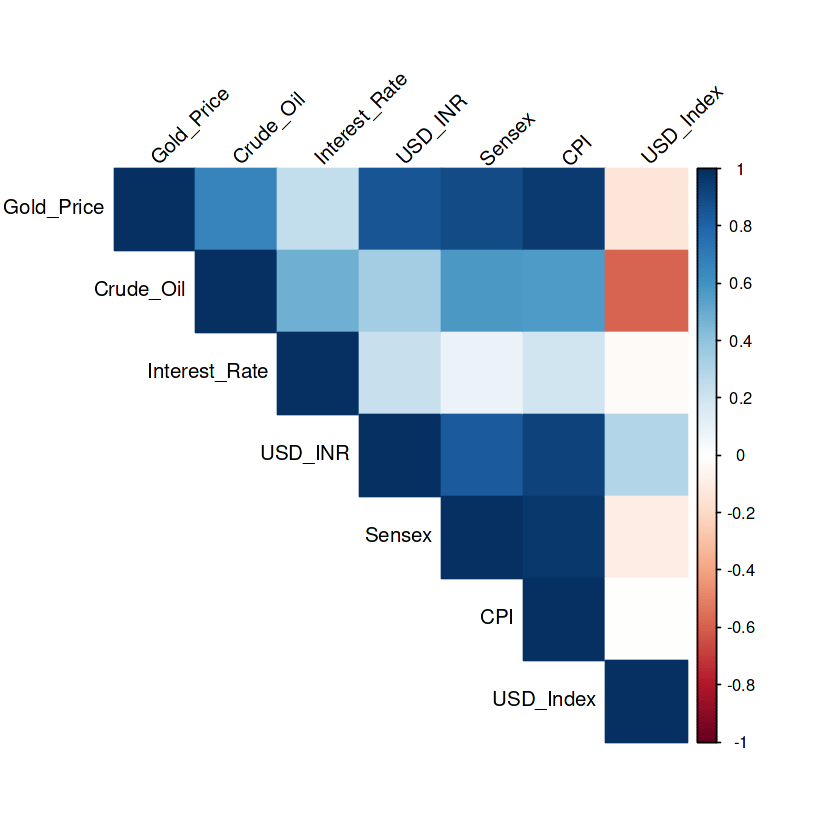

In [13]:
correlation_matrix <- cor(gold_data %>% select_if(is.numeric))
corrplot(correlation_matrix, method = "color", type = "upper", tl.col = "black", tl.srt = 45)


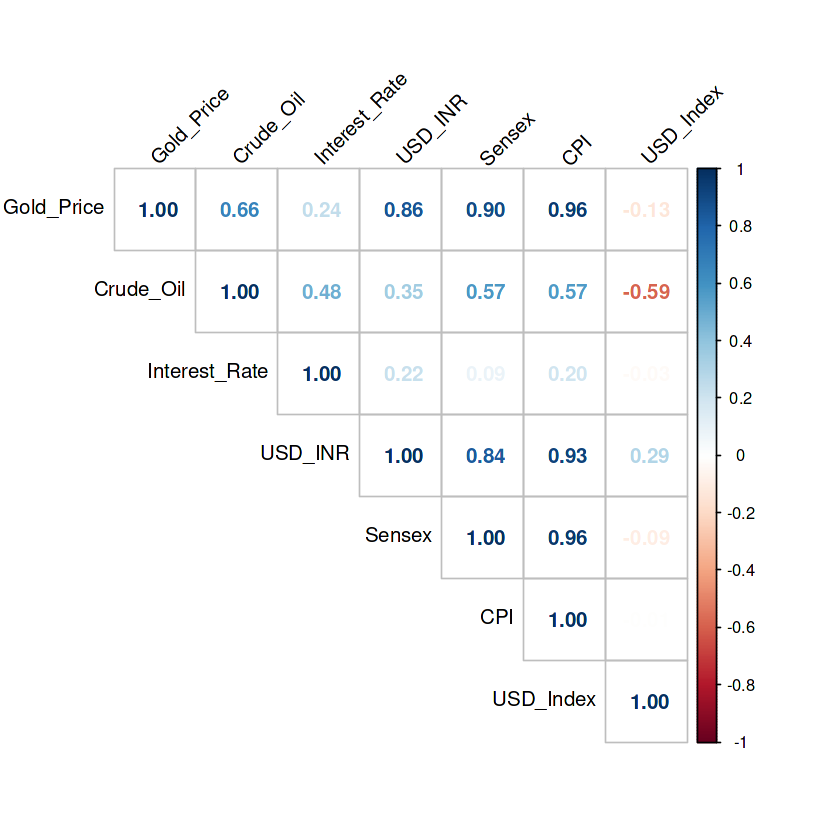

In [14]:
correlation_matrix <- cor(gold_data %>% select_if(is.numeric))
corrplot(correlation_matrix, method = "number", type = "upper", tl.col = "black", tl.srt = 45)


## 2.5. Visual hóa xu hướng theo thời gian

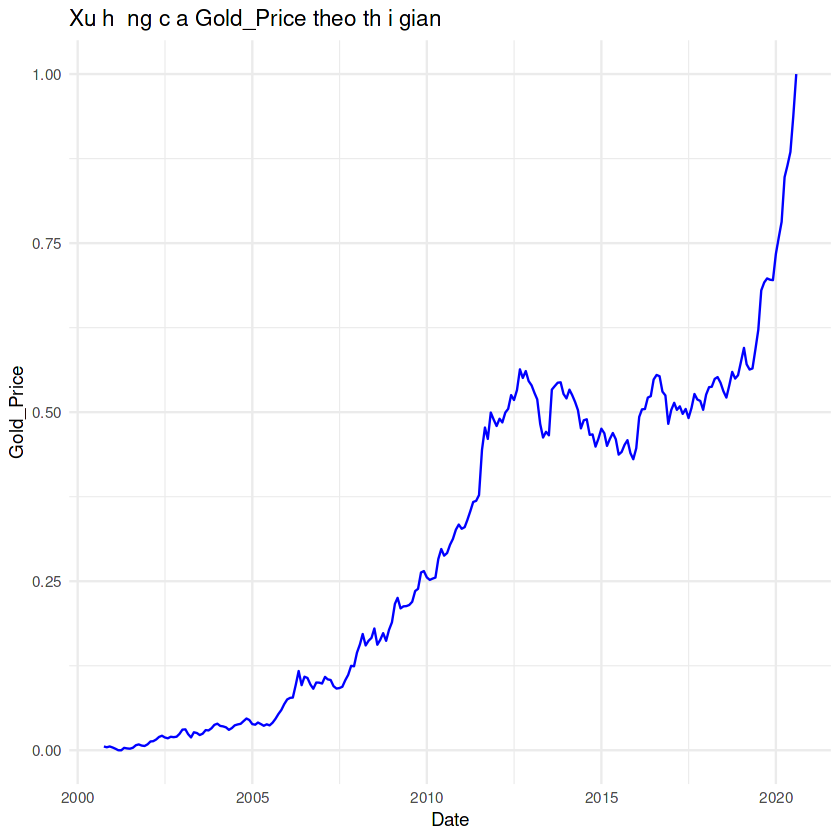

In [15]:
# Trực quan hóa xu hướng Gold_Price theo thời gian
ggplot(gold_data, aes(x = Date, y = Gold_Price, group = 1)) + 
  geom_line(color = "blue") + 
  theme_minimal() +
  ggtitle("Xu hướng của Gold_Price theo thời gian")

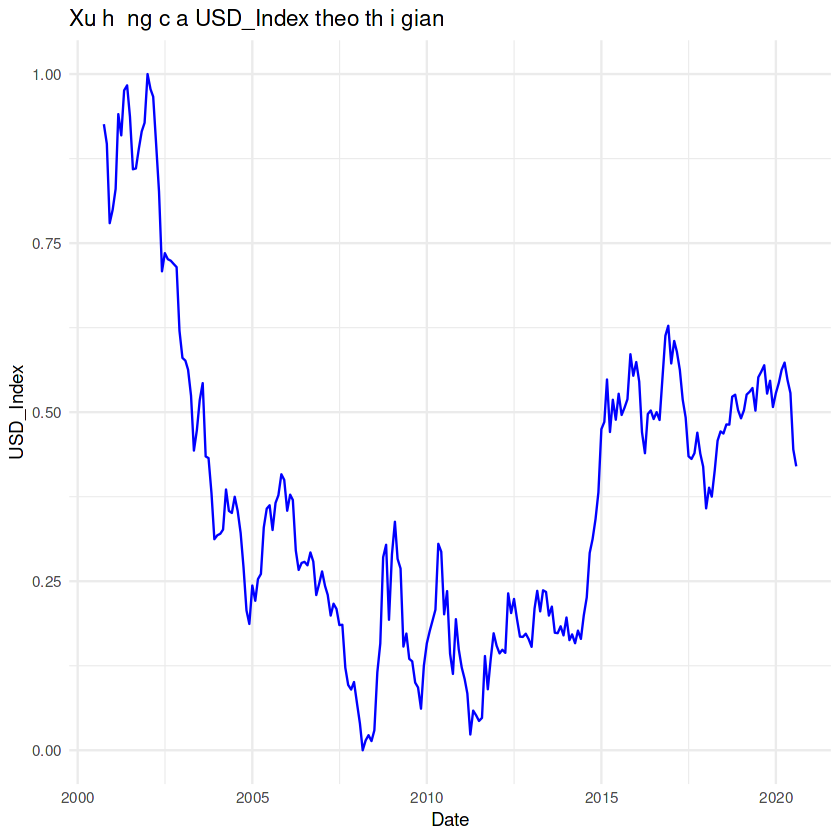

In [16]:
# Trực quan hóa xu hướng Gold_Price theo thời gian
ggplot(gold_data, aes(x = Date, y = USD_Index, group = 1)) + 
  geom_line(color = "blue") + 
  theme_minimal() +
  ggtitle("Xu hướng của USD_Index theo thời gian")

## 3. Thực hiện các bài test

In [196]:
# Tính hệ số tương quan Pearson
pearson_corr <- cor(gold_data[, c("Gold_Price", "Crude_Oil", "Interest_Rate", "USD_INR", "Sensex", "CPI", "USD_Index")], method = "pearson")

# ANOVA để kiểm tra ảnh hưởng của Interest_Rate lên Gold_Price
anova_result <- aov(Gold_Price ~ USD_Index, data = gold_data)
summary(anova_result)

# T-Test để kiểm tra sự khác biệt giữa Gold_Price và Crude_Oil
t_test_result <- t.test(gold_data$Gold_Price, gold_data$USD_Index)

# In kết quả
print("Pearson Correlation:")
print(pearson_corr)

             Df Sum Sq Mean Sq F value Pr(>F)  
USD_Index     1  0.241 0.24143   4.254 0.0402 *
Residuals   237 13.451 0.05675                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] "Pearson Correlation:"
              Gold_Price  Crude_Oil Interest_Rate   USD_INR      Sensex
Gold_Price     1.0000000  0.6616897    0.24199570 0.8555548  0.89749037
Crude_Oil      0.6616897  1.0000000    0.48456717 0.3481417  0.57050615
Interest_Rate  0.2419957  0.4845672    1.00000000 0.2224741  0.08623231
USD_INR        0.8555548  0.3481417    0.22247411 1.0000000  0.83807502
Sensex         0.8974904  0.5705062    0.08623231 0.8380750  1.00000000
CPI            0.9590482  0.5650253    0.19908195 0.9288145  0.96033420
USD_Index     -0.1327891 -0.5890536   -0.02568761 0.2902481 -0.09200408
                       CPI    USD_Index
Gold_Price     0.959048215 -0.132789075
Crude_Oil      0.565025318 -0.589053606
Interest_Rate  0.199081954 -0.025687614
USD_INR        0.928814544  0.290248080
Sensex         0.960334198 -0.092004080
CPI            1.000000000 -0.007089212
USD_Index     -0.007089212  1.000000000


In [197]:
print("ANOVA Result:")
print(summary(anova_result))

[1] "ANOVA Result:"
             Df Sum Sq Mean Sq F value Pr(>F)  
USD_Index     1  0.241 0.24143   4.254 0.0402 *
Residuals   237 13.451 0.05675                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


- Giá trị F value = 4.254 và p-value = 0.0402 cho thấy rằng có sự khác biệt đáng kể giữa giá trị của Gold_Price theo biến USD_Index ở mức ý nghĩa 5% (p-value < 0.05).
- Vì p-value nhỏ hơn 0.05, ta có thể bác bỏ giả thuyết gốc rằng không có mối liên hệ giữa USD_Index và Gold_Price. Điều này có nghĩa là sự thay đổi của USD_Index có ảnh hưởng đáng kể đến giá trị của Gold_Price.


In [198]:
print("T-Test Result:")
print(t_test_result)

[1] "T-Test Result:"

	Welch Two Sample t-test

data:  gold_data$Gold_Price and gold_data$USD_Index
t = -3.256, df = 475.66, p-value = 0.001211
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.11305663 -0.02795635
sample estimates:
mean of x mean of y 
0.3089838 0.3794903 



## 4. Xây dựng mô hình hồi quy (chưa dùng Regularization hay GridSearch hay K-Fold)

In [199]:
gold_data <- gold_data[ , !names(gold_data) %in% c("Date")]
head(gold_data)
# Kiểm tra tên các cột
print(names(gold_data))

Gold_Price,Crude_Oil,Interest_Rate,USD_INR,Sensex,CPI,USD_Index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.570401e-03,0.09406382,0.6250000,0.1886173,0.02339672,0.005401318,0.9258877
4.439877e-03,0.10349521,0.6250000,0.2012426,0.03086171,0.006265529,0.8967795
5.632066e-03,0.04813219,0.6250000,0.2002182,0.03018875,0.002700659,0.7795211
4.090442e-03,0.05311115,0.6250000,0.1945251,0.03941300,0.001836448,0.7993394
2.117163e-03,0.06288031,0.5416667,0.1939434,0.03734027,0.000000000,0.8300991
4.110997e-05,0.04620153,0.4583333,0.1965145,0.02062268,0.001836448,0.9407514


[1] "Gold_Price"    "Crude_Oil"     "Interest_Rate" "USD_INR"      
[5] "Sensex"        "CPI"           "USD_Index"    


In [200]:

# gold_data <- gold_data[ , !(names(gold_data) %in% c("Interest_Rate","Crude_Oil", "USD_Index"))]

# gold_data <- gold_data[ , !(names(gold_data) %in% c("Interest_rate" ,"USD_Index"))]


In [201]:
# Kiểm tra lại dữ liệu sau khi loại bỏ cột
print(head(gold_data))

# A tibble: 6 × 7
  Gold_Price Crude_Oil Interest_Rate USD_INR Sensex     CPI USD_Index
       <dbl>     <dbl>         <dbl>   <dbl>  <dbl>   <dbl>     <dbl>
1  0.00557      0.0941         0.625   0.189 0.0234 0.00540     0.926
2  0.00444      0.103          0.625   0.201 0.0309 0.00627     0.897
3  0.00563      0.0481         0.625   0.200 0.0302 0.00270     0.780
4  0.00409      0.0531         0.625   0.195 0.0394 0.00184     0.799
5  0.00212      0.0629         0.542   0.194 0.0373 0           0.830
6  0.0000411    0.0462         0.458   0.197 0.0206 0.00184     0.941


In [202]:
library(caret)
library(glmnet)


MSE: 16228443 
R²: 0.9056059 


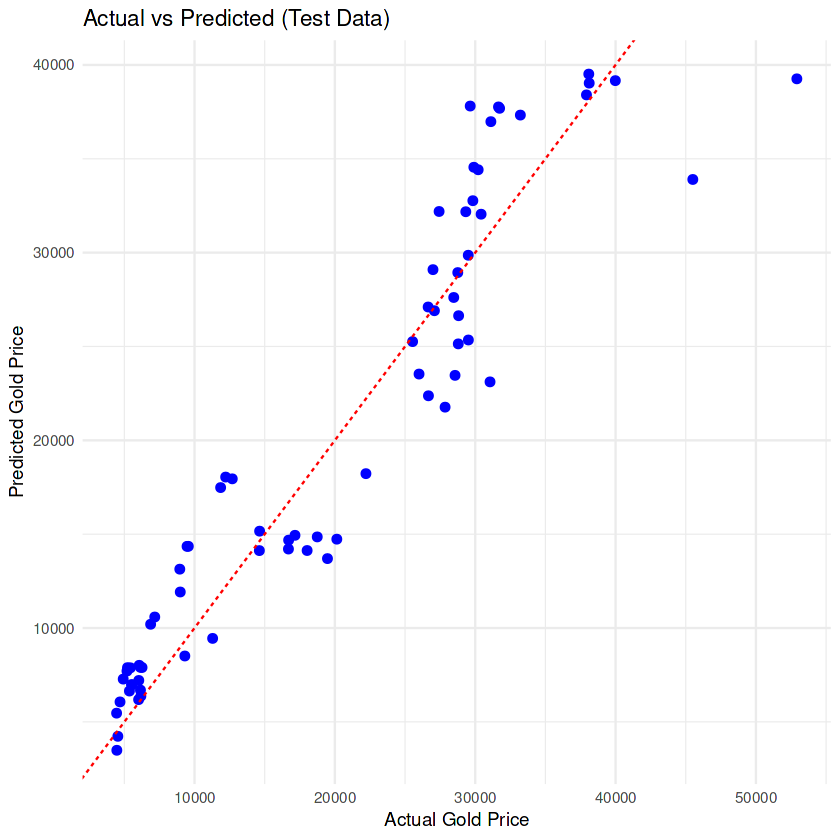

In [203]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra (70% huấn luyện, 30% kiểm tra)
set.seed(123)  # Đảm bảo việc chia dữ liệu là ngẫu nhiên nhưng có thể tái lập
train_index <- createDataPartition(y, p = 0.7, list = FALSE)

# Tạo tập huấn luyện và tập kiểm tra
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

# Xây dựng linear model
model <- lm(y ~ ., data = train_data)

# Dự đoán
y_pred <- predict(model, newdata = test_data)

# Tính MSE
mse <- mean((test_data$y - y_pred)^2)
cat("MSE:", mse, "\n")

# Tính R²
r_squared <- summary(model)$r.squared
cat("R²:", r_squared, "\n")

# Tạo dataframe chứa giá trị thực tế và dự đoán
result_data <- data.frame(Actual = test_data$y, Predicted = y_pred)

# Vẽ biểu đồ Actual vs Predicted trên tập kiểm tra
ggplot(result_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue", size = 2) +  # Vẽ các điểm
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Đường y = x
  labs(title = "Actual vs Predicted (Test Data)",
       x = "Actual Gold Price",
       y = "Predicted Gold Price") +
  theme_minimal()

## 4.1 Xây dựng linear model dùng cross-validation, không regularization, không grid search (tính MSE và R²)

MSE (CV): 16228443 
R² (CV): 0.9056059 


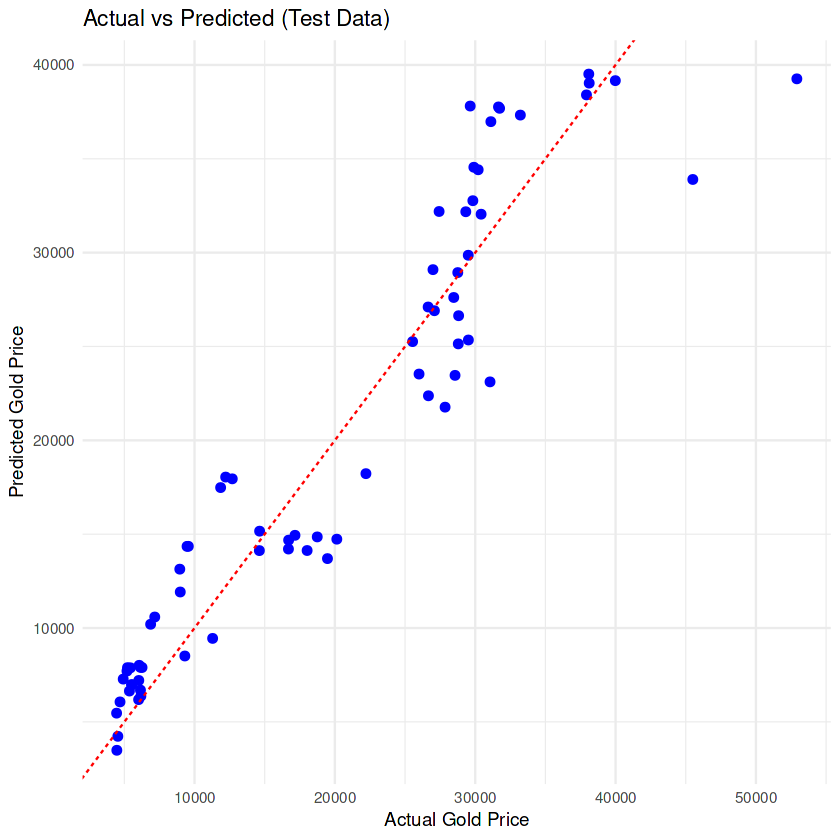

In [204]:
# Tách dữ liệu thành biến đầu vào và biến mục tiêu
# Chia dữ liệu thành tập huấn luyện và kiểm tra (70% huấn luyện, 30% kiểm tra)
set.seed(42)  # Đảm bảo việc chia dữ liệu là ngẫu nhiên nhưng có thể tái lập
train_index <- createDataPartition(y, p = 0.7, list = FALSE)


# Thiết lập Cross-Validation (10-fold CV)
control <- trainControl(method = "cv", number = 5)

# Xây dựng linear model với cross-validation
model_cv <- train(y ~ ., data = train_data, method = "lm", trControl = control)

# Dự đoán
y_pred_cv <- predict(model_cv, newdata = test_data)

# Tính MSE cho cross-validation
mse_cv <- mean((test_data$y - y_pred_cv)^2)
cat("MSE (CV):", mse_cv, "\n")

# Tính R² cho cross-validation
r_squared_cv <- summary(model_cv$finalModel)$r.squared
cat("R² (CV):", r_squared_cv, "\n")


# Tạo dataframe chứa giá trị thực tế và dự đoán
result_data <- data.frame(Actual = test_data$y, Predicted = y_pred)

# Vẽ biểu đồ Actual vs Predicted trên tập kiểm tra
ggplot(result_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue", size = 2) +  # Vẽ các điểm
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Đường y = x
  labs(title = "Actual vs Predicted (Test Data)",
       x = "Actual Gold Price",
       y = "Predicted Gold Price") +
  theme_minimal()


# Nhận xét: Tuy đã dùng cross-validation nhưng các giá trị của metrics không thay đổi chứng to mô hình không bị overfitting

## 4.2. Xây dựng linear model dùng cross-validation, có  regularization, không grid search (tính MSE và R²)

MSE (Regularized): 15946253 
R² (Regularized): 0.8885712 


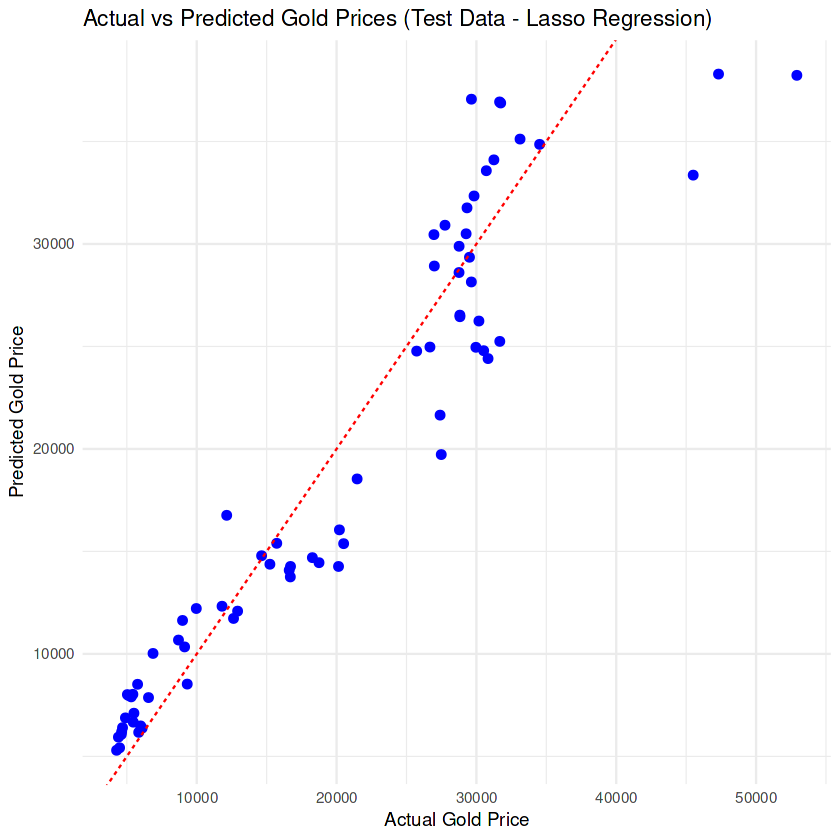

In [205]:
# Chuyển dữ liệu thành matrix cho glmnet
X_matrix <- as.matrix(X)  # Dữ liệu đầu vào
y_vector <- as.vector(y)  # Biến mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% huấn luyện, 30% kiểm tra)
set.seed(42)  # Đảm bảo kết quả có thể tái lập
train_index <- createDataPartition(y_vector, p = 0.7, list = FALSE)

# Tạo tập huấn luyện và tập kiểm tra
X_train <- X_matrix[train_index, ]
X_test <- X_matrix[-train_index, ]
y_train <- y_vector[train_index]
y_test <- y_vector[-train_index]

# Thiết lập Cross-Validation (5-fold CV) cho regularized linear model (Lasso)
cv_model <- cv.glmnet(X_train, y_train, alpha = 1, nfolds = 5)  # alpha = 1 là Lasso

# Dự đoán trên tập kiểm tra
y_pred_regular <- predict(cv_model, s = "lambda.min", newx = X_test)

# Tính MSE
mse_regular <- mean((y_test - y_pred_regular)^2)
cat("MSE (Regularized):", mse_regular, "\n")

# Tính R²
ss_total <- sum((y_test - mean(y_test))^2)
ss_residual <- sum((y_test - y_pred_regular)^2)
r_squared_regular <- 1 - (ss_residual / ss_total)
cat("R² (Regularized):", r_squared_regular, "\n")

# Tạo dataframe chứa giá trị thực tế và dự đoán
result_data <- data.frame(Actual = y_test, Predicted = as.numeric(y_pred_regular))

# Vẽ biểu đồ Actual vs Predicted
ggplot(result_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue", size = 2) +  # Vẽ các điểm
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Đường y = x
  labs(title = "Actual vs Predicted Gold Prices (Test Data - Lasso Regression)",
       x = "Actual Gold Price",
       y = "Predicted Gold Price") +
  theme_minimal()

## 4.3. Xây dựng linear model dùng cross-validation, dùng regularization, và dùng grid search để tìm learning rate tốt nhất (tính MSE và R²):

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (70% huấn luyện, 30% kiểm tra)
set.seed(42)  # Đảm bảo việc chia dữ liệu có thể tái lập
train_index <- createDataPartition(y, p = 0.7, list = FALSE)

train_data <- data[train_index, ]  # Tập huấn luyện
test_data <- data[-train_index, ]  # Tập kiểm tra*
# Thiết lập tham số grid search cho alpha và lambda
grid <- expand.grid(alpha = seq(0, 1, length = 11),    # alpha từ 0 đến 1 với 10 giá trị
                    lambda = 10^seq(-3, 3, length = 100))  # lambda từ 10^-3 đến 10^3

# Dùng cross-validation và regularization với grid search
model_grid <- train(y ~ ., data = train_data, method = "glmnet", 
                    trControl = trainControl(method = "cv", number = 10),
                    tuneGrid = grid)

# Dự đoán trên tập kiểm tra
y_pred_grid <- predict(model_grid, newdata = test_data)

# Tính MSE cho grid search trên tập kiểm tra
mse_grid <- mean((test_data$y - y_pred_grid)^2)
cat("MSE (Grid Search):", mse_grid, "\n")

# Tính R^2 trên tập kiểm tra
ss_res <- sum((test_data$y - y_pred_grid)^2)  # Tổng bình phương phần dư (Residual Sum of Squares)
ss_tot <- sum((test_data$y - mean(test_data$y))^2)  # Tổng bình phương tổng (Total Sum of Squares)
r_squared_grid <- 1 - (ss_res / ss_tot)
cat("R² (Grid Search):", r_squared_grid, "\n")
best_params <-model_grid$bestTune
print(best_params)

In [ ]:
gold_data <- gold_data[ , !(names(gold_data) %in% c("Interest_rate" ,"USD_Index","Sensex","Crude_Oil","USD_INR"))]

In [ ]:
# Chia dữ liệu thành tập huấn luyện và kiểm tra (70% huấn luyện, 30% kiểm tra)
set.seed(123)  # Đảm bảo việc chia dữ liệu là ngẫu nhiên nhưng có thể tái lập
train_index <- createDataPartition(y, p = 0.7, list = FALSE)

# Tạo tập huấn luyện và tập kiểm tra
train_data <- data[train_index, ]
test_data <- data[-train_index, ]

# Xây dựng linear model
model <- lm(y ~ ., data = train_data)

# Dự đoán
y_pred <- predict(model, newdata = test_data)

# Tính MSE
mse <- mean((test_data$y - y_pred)^2)
cat("MSE:", mse, "\n")

# Tính R²
r_squared <- summary(model)$r.squared
cat("R²:", r_squared, "\n")

# Tạo dataframe chứa giá trị thực tế và dự đoán
result_data <- data.frame(Actual = test_data$y, Predicted = y_pred)

# Vẽ biểu đồ Actual vs Predicted trên tập kiểm tra
ggplot(result_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue", size = 2) +  # Vẽ các điểm
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +  # Đường y = x
  labs(title = "Actual vs Predicted (Test Data)",
       x = "Actual Gold Price",
       y = "Predicted Gold Price") +
  theme_minimal()